<a href="https://colab.research.google.com/github/debojit11070/langgraph_practice_1/blob/main/langgraph_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import TypedDict
class Movie(TypedDict):
  name: str
  year: int


movies = [
  {
    "name": "The Shawshank Redemption",
    "year": 1994
  }]

In [2]:
movies

[{'name': 'The Shawshank Redemption', 'year': 1994}]

In [3]:
from typing import Union

def square(x:Union[int, float]) -> float:
  return x*x



In [4]:
square(5)

25

In [5]:
from typing import Optional

In [6]:
def nice_meassage(name: Optional[str]) -> None:
  if name is None:
    print("Hey random person")

  else:
    print(f"Hey {name}")

In [7]:
nice_meassage(None)

Hey random person


In [8]:
square = lambda x: x*x
square(10)

100

In [9]:
nums = [1,2,3,4]
squares = list(map(lambda x: x*x, nums))

In [10]:
squares

[1, 4, 9, 16]

## Hello world agent

In [11]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 11.0 MB/s eta 0:00:00


In [13]:
# # now create an agentstate - shared data structure
# class AgentState(TypedDict): ##state schema
#   message: str

# def greeting_node(state: AgentState) -> StateGraph:
#   """ simple node that adds a greeting message to the state"""
#   state["message"] = f"Hey {state['message']}, How is your day going?"
#   return state

In [14]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [15]:
graph = StateGraph(AgentState)

In [16]:
graph.add_node("greeter", greeting_node)

NameError: name 'greeting_node' is not defined

In [18]:
# graph.set_entry_point("greeter")
# graph.set_finish_point("greeter")

# app = graph.compile()

In [19]:
# app

In [20]:
# # !pip install IPython
# from IPython.display import Image, display
# display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
# result = app.invoke({"message": "bob"})

In [22]:
# result["message"]

In [23]:
# now create an agentstate - shared data structure
# class AgentState(TypedDict): ##state schema
#   message: str

# def greeting_node(state: AgentState) -> StateGraph:
#   """ simple node that adds a greeting message to the state"""
#   state["message"] = f"{state['message']}, you're doing an amazing job learning LangGraph?"
#   return state

In [24]:
#


In [25]:
# app

In [26]:
# result = app.invoke({"message": "bob"})

In [27]:
# result["message"]

In [31]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [32]:
class AgentState(TypedDict):
  values: List[int]
  name: str
  result: str

In [33]:
def process_values(state: AgentState) -> AgentState:
  """this function handles multiple different inputs"""
  state["result"] = f"Hi there {state['name']}! your sum = {sum(state['values'])}"
  return state

In [34]:
graph = StateGraph(AgentState)

In [37]:
#graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

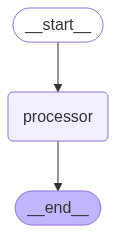

In [38]:
app

In [40]:
answers = app.invoke({"values":[1,2,3,4], "name":"bob"})

In [41]:
print(answers)

{'values': [1, 2, 3, 4], 'name': 'bob', 'result': 'Hi there bob! your sum = 10'}


## graph 3: SEQUENTIAL GRAPH

In [42]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [43]:
class AgentState(TypedDict):
  name: str
  age: str
  final: str



In [44]:
def first_node(state:AgentState) -> AgentState:
  """first node of our sequence"""
  state["final"] = f"Hi {state['name']}! How old are you?"
  return state

def second_node(state:AgentState) -> AgentState:
    state["final"] =state["final"] + f"your {state['age']} years old!!"
    return state

In [49]:
# graph = StateGraph(AgentState)

# graph.add_node("first_node", first_node)
# graph.add_node("second_node", second_node)

# graph.set_entry_point("first_node")
# graph.add_edge("first_node", "second_node")
# graph.set_finish_point("second_node")

# app = graph.compile()

In [50]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

class AgentState(TypedDict):
  name: str
  age: str
  final: str

def first_node(state:AgentState) -> AgentState:
  """first node of our sequence"""
  state["final"] = f"Hi {state['name']}! How old are you?"
  return state

def second_node(state:AgentState) -> AgentState:
    state["final"] =state["final"] + f"your {state['age']} years old!!"
    return state

graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")

app = graph.compile()

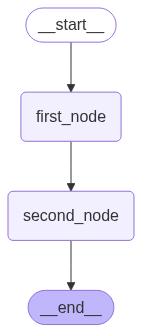

In [51]:
app

## Graph 4: Conditional Graph

In [2]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 8.1 MB/s eta 0:00:00


In [3]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [4]:
class AgentState(TypedDict):
  number1: int
  operation: str
  number2: int
  finalNumber: int

In [6]:
def adder(state:AgentState) -> AgentState:
  """we add 2 numbers"""
  state["finalNumber"] = state["number1"] + state["number2"]
  return state

def subtractro(state:AgentState) -> AgentState:
  """we add 2 numbers"""
  state["finalNumber"] = state["number1"] - state["number2"]
  return state

def decide_next_node(state:AgentState) -> AgentState:
  """this will select the next node of the graph"""
  if state["operation"] == "+":
    return "addition_operation"
  elif state["operation"] == "-":
    return "subtraction_operation"


In [11]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractro)
graph.add_node("router", lambda state:state) # pass through function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    ##path map
    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

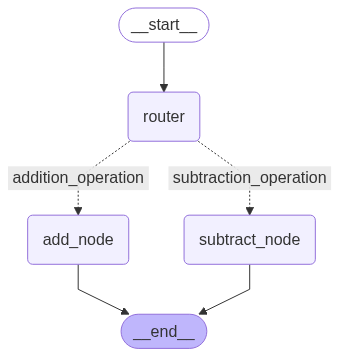

In [12]:
app

In [13]:
initial_state_1 = AgentState(number1=10, operation="+", number2=5)
initial_state_2 = AgentState(number1=10, operation="-", number2=5)

In [14]:
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '+', 'number2': 5, 'finalNumber': 15}


In [15]:
print(app.invoke(initial_state_2))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}


In [16]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    numbers: List[int]
    operation: str
    result: int

In [17]:
def adder_four(state: AgentState) -> AgentState:
    """Adds four numbers"""
    if len(state["numbers"]) == 4:
        state["result"] = sum(state["numbers"])
    else:
        state["result"] = 0  # Or handle the error appropriately
    return state

def subtractor_four(state: AgentState) -> AgentState:
    """Subtracts the last three numbers from the first"""
    if len(state["numbers"]) == 4:
        state["result"] = state["numbers"][0] - sum(state["numbers"][1:])
    else:
        state["result"] = 0 # Or handle the error appropriately
    return state

def decide_next_node_four(state: AgentState) -> str:
    """Decides the next node based on the operation"""
    if state["operation"] == "add":
        return "addition_operation_four"
    elif state["operation"] == "subtract":
        return "subtraction_operation_four"
    else:
        # Handle unexpected operations
        return END # Or a dedicated error node

In [21]:
graph_four = StateGraph(AgentState)

graph_four.add_node("add_node2", adder_four)
graph_four.add_node("subtract_node2", subtractor_four)
graph_four.add_node("router_four", lambda state: state) # Pass through node

graph_four.add_edge(START, "router_four")
graph_four.add_conditional_edges(
    "router_four",
    decide_next_node_four,
    {
        "addition_operation_four": "add_node2", # Updated target
        "subtraction_operation_four": "subtract_node2", # Updated target
        END: END # Handle unexpected operations by ending the graph
    }
)

graph_four.add_edge("add_node2", END) # Updated source
graph_four.add_edge("subtract_node2", END) # Updated source

app_four = graph_four.compile()

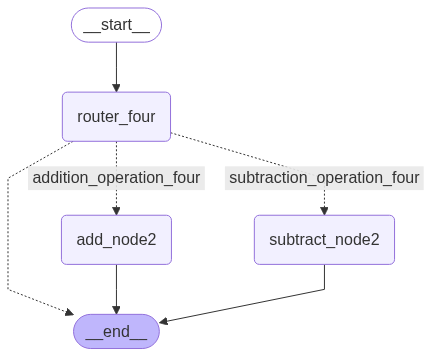

In [22]:
app_four

In [19]:
# Example usage
initial_state_add = AgentState(numbers=[10, 5, 2, 3], operation="add")
initial_state_subtract = AgentState(numbers=[10, 5, 2, 3], operation="subtract")

result_add = app_four.invoke(initial_state_add)
result_subtract = app_four.invoke(initial_state_subtract)

print("Addition Result:", result_add)
print("Subtraction Result:", result_subtract)

Addition Result: {'numbers': [10, 5, 2, 3], 'operation': 'add', 'result': 20}
Subtraction Result: {'numbers': [10, 5, 2, 3], 'operation': 'subtract', 'result': 0}


## Looping graph

In [23]:
 from langgraph.graph import StateGraph, END
 import random
 from typing import Dict, List, TypedDict

In [25]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [28]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state["name"] = f"Hi there, {state['name']}"
    state["counter"] = 0

    return state

def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1

    return state


def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"  # Continue looping
    else:
        return "exit"  # Exit the loop

In [29]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")


graph.add_conditional_edges(
    "random",     # Source node
    should_continue, # Action
    {
        "loop": "random",
        "exit": END
    }
)

graph.set_entry_point("greeting")

app = graph.compile()

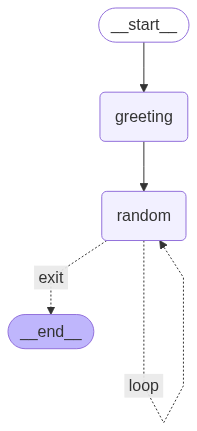

In [30]:
app

In [31]:
app.invoke({"name":"Vaibhav", "number":[], "counter":-100})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Vaibhav', 'number': [5, 7, 0, 2, 4], 'counter': 5}

In [32]:
from typing import TypedDict, Annotated
import random

# Define state
class GameState(TypedDict):
    lower_bound: Annotated[int, "Lower bound of the range"]
    upper_bound: Annotated[int, "Upper bound of the range"]
    attempts: Annotated[int, "Number of attempts made"]
    target: Annotated[int, "Target number to guess"]

# Initial state
initial_state = GameState(
    lower_bound=1,
    upper_bound=20,
    attempts=0,
    target=random.randint(1, 20)
)

def guess_node(state: GameState) -> dict:
    if state["attempts"] >= 7:
        return {"result": "Max attempts reached!"}

    guess = (state["lower_bound"] + state["upper_bound"]) // 2
    state["attempts"] += 1
    print(f"Guess: {guess}, Attempts: {state['attempts']}, Range: [{state['lower_bound']}, {state['upper_bound']}]")
    return {"guess": guess}

def hint_node(state: GameState, hint: str) -> dict:
    guess = state.get("guess", (state["lower_bound"] + state["upper_bound"]) // 2)

    if hint == "correct":
        return {"result": f"Correct! Guessed {guess} in {state['attempts']} attempts."}
    elif hint == "higher":
        state["lower_bound"] = guess + 1
    elif hint == "lower":
        state["upper_bound"] = guess - 1
    else:
        return {"result": "Invalid hint!"}

    if state["lower_bound"] > state["upper_bound"]:
        return {"result": "Invalid range!"}
    return {}

def main():
    state = initial_state.copy()
    while True:
        update = guess_node(state)
        if "result" in update:
            print(update["result"])
            break

        hint = input("Enter hint (higher/lower/correct): ").lower()
        update = hint_node(state, hint)
        if "result" in update:
            print(update["result"])
            break

if __name__ == "__main__":
    main()

Guess: 10, Attempts: 1, Range: [1, 20]
Enter hint (higher/lower/correct): higher
Guess: 15, Attempts: 2, Range: [11, 20]
Enter hint (higher/lower/correct): lower
Guess: 12, Attempts: 3, Range: [11, 14]
Enter hint (higher/lower/correct): higher
Guess: 13, Attempts: 4, Range: [13, 14]
Enter hint (higher/lower/correct): lower
Invalid range!
